# PCA: Eigenimages

In [6]:
%matplotlib notebook
''' Initial Imports'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.decomposition import PCA


In [7]:
'''Loading handwritten digit data'''
from sklearn.datasets import load_digits
dig_data = load_digits()
dig_img = dig_data.images
X = dig_data.data
digits = dig_data.target


## Quick Breakout

### Instantiate two PCA objects: 

- ### one can explain at least 50% of the variance
- ### one can explain at least 95% of the variance
- ### determine the dimensionality of each

In [8]:
pca50 = PCA(0.5)
pca95 = PCA(0.95)

X_trans50 = pca50.fit_transform(X)
X_trans95 = pca95.fit_transform(X)

print(X.shape)
print(X_trans50.shape)
print(X_trans95.shape)


(1797, 64)
(1797, 5)
(1797, 29)


In [9]:
'''How many components do we need to account for 50% and 95% of the variance?'''

pca50 = PCA(0.5) # keep 50% of variance
pca95 = PCA(0.95) # keep 95% of variance

X_trans50 = pca50.fit_transform(X)
X_trans95 = pca95.fit_transform(X)

print(X.shape)
print(X_trans50.shape)
print(X_trans95.shape)

# A significant reduction of dimensionality!!

(1797, 64)
(1797, 5)
(1797, 29)


## So what are the PCA components?  
## Answer: Eigenimages.

## Digging Deeper: Eigenimages

## Breakout Exercise

### Show the first 20 eigenimages

<IPython.core.display.Javascript object>


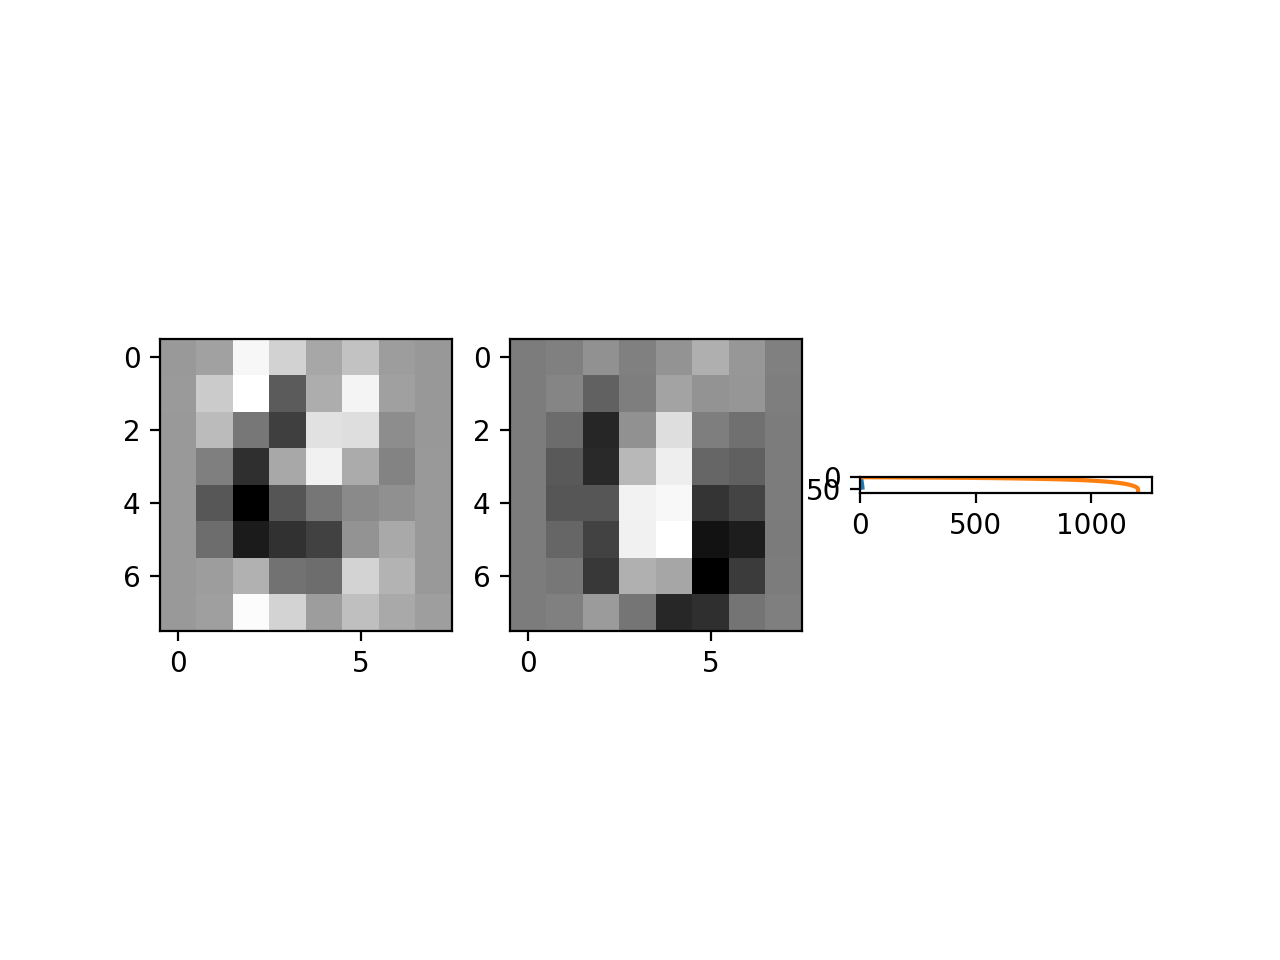

In [18]:
pca3 = PCA(3)
pca3.fit(X)
nside = 8
# print(pca3.components_)
P3 = pca3.components_

fig = plt.figure() 
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


u1 = np.reshape(P3[0], (nside, nside))
ax1.imshow(u1, cmap = 'binary')
u2 = np.reshape(P3[1], (nside, nside))
ax2.imshow(u2, cmap = 'binary')
u3 = np.reshape(P3[2], (nside, nside))
ax3.imshow(u3, cmap = 'binary')
plt.show()

# nside = 8
# print(pca3)
# fig, axes = plt.subplots(nside, nside, figsize=(8, 8))
# X = np.reshape(pca3, (nside, nside, 8, -1))
# X.imshow(X[i, j], cmap = 'binary')

## Breakout

In [10]:
'''
In this cell, I'm ONLY changing dig_idx and NOT the eigenimages!!

So the only thing that's changed are the coeff's (Xproj).

Now, tell me, can you recognize the digit?

With 10 components
For 0, 1, 3, 4, 8, 9 yes; 2, 5, 6 iffy; 7: sort of


Now ask students to try using 20, and then 30, components and see how many of the first 10 digits
can be recognized.

'''
dig_idx = 9

dig_im_rec = np.zeros((8, 8))
coeffs = Xproj[dig_idx]

print('coeffs.shape', coeffs.shape)
for i in range(n_comp):
    dig_im_rec += coeffs[i]*pca_comps[i].reshape((8, 8))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (6, 3))
ax0.imshow(dig_im_rec, cmap='binary')
ax1.imshow(dig_img[dig_idx], cmap='binary')

# To turn off grid (under seaborn, the default for grid is on.)
ax0.set_title('Reconstructed Image')
ax0.grid(False)
ax0.axis('off')

ax1.set_title('Original Image')
ax1.grid(False)
ax1.axis('off')
plt.show()

NameError: name 'Xproj' is not defined

## With Fourier decomposition, all the components (basis vectors) are orthogonal.

## With PCA decomposition, all the components (basis vectors or new coordinate system axes) are _also_ orthogonal.  The components are typically referred to as eigenvectors.  

## Difference between Fouirier decomposition and PCA:

- ### Fourier: the basis vectors are always the same for every problem.

- ### PCA: For every problem (digit recognition, facial recognition, food group recognition), it figures out an _optimal_ set of basis vectors (components, or eigenvectors, or new coordinate system axes).  Therefore a relatively small number of such eigenvectors can be used to construct a partial image that is a good enough approximation (e.g., for the purpose of recogntion).  

### [Very much like a partial Fourier expansion -- think Fourier Descriptors, but this time for a 2D object, not just a 1D outline.]

In [19]:
'''An aside: numpy.cumsum()'''
x = np.arange(10)
y = np.cumsum(x)

plt.plot(x, y)
plt.show()


## Breakout: Choosing the Number of Components

- ### To get a sense of how much information we have thrown away by only keeping a certain number of components, we can plot the _total_ _explained variance_ as a function of the number components.

- ### On the same figure draw two horizontal lines that correspond to 90% and 99% cumulative variances.

<IPython.core.display.Javascript object>


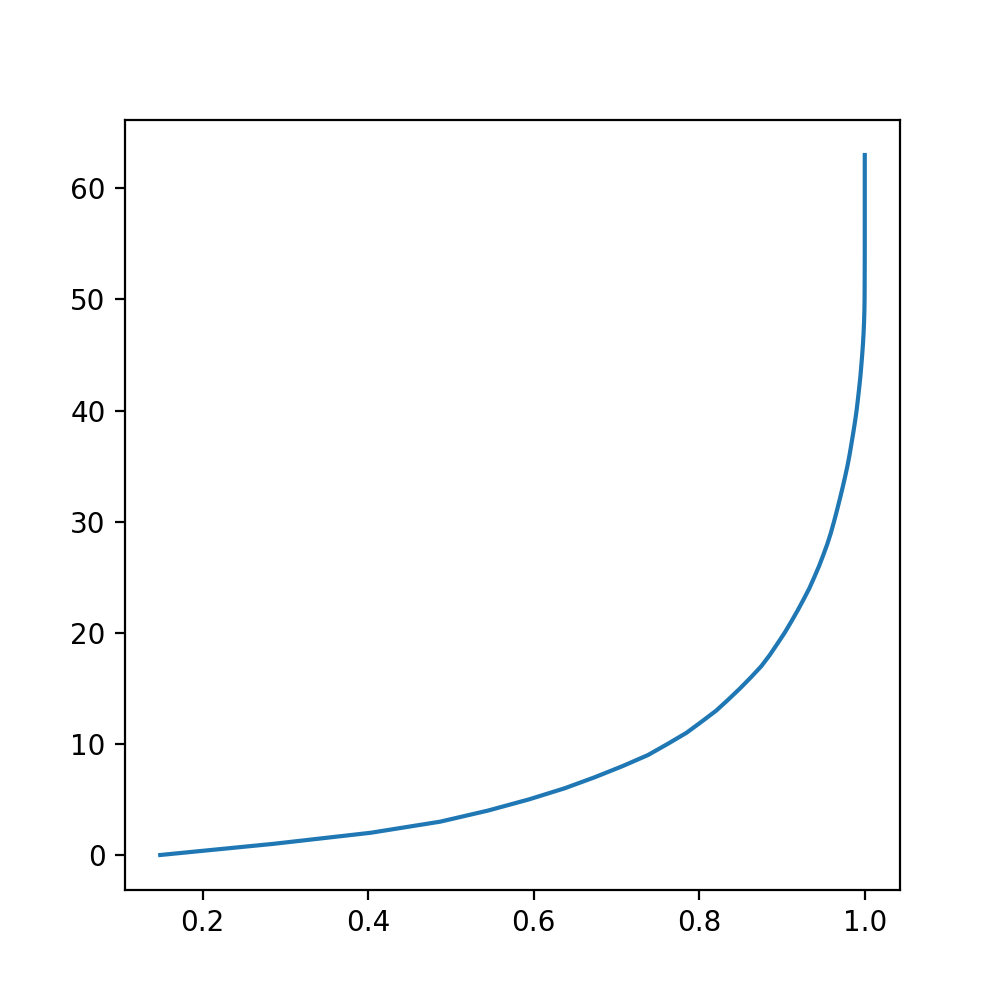

[  1.79006930e+02   1.63717747e+02   1.41788439e+02   1.01100375e+02
   6.95131656e+01   5.91085249e+01   5.18845391e+01   4.40151067e+01
   4.03109953e+01   3.70117984e+01   2.85190412e+01   2.73211698e+01
   2.19014881e+01   2.13243565e+01   1.76367222e+01   1.69468639e+01
   1.58513899e+01   1.50044602e+01   1.22344732e+01   1.08868593e+01
   1.06935663e+01   9.58259779e+00   9.22640260e+00   8.69036872e+00
   8.36561190e+00   7.16577961e+00   6.91973881e+00   6.19295508e+00
   5.88499123e+00   5.15586690e+00   4.49129656e+00   4.24687799e+00
   4.04743883e+00   3.94340334e+00   3.70647245e+00   3.53165306e+00
   3.08457409e+00   2.73780002e+00   2.67210896e+00   2.54170563e+00
   2.28298744e+00   1.90724229e+00   1.81716569e+00   1.68996439e+00
   1.40197220e+00   1.29221888e+00   1.15893419e+00   9.31220008e-01
   6.69850594e-01   4.86065217e-01   2.52350432e-01   9.91527944e-02
   6.31307848e-02   6.07377581e-02   3.96662297e-02   1.49505636e-02
   8.47307261e-03   3.62365957e-03

In [43]:
pca = PCA().fit(X)
r = pca.explained_variance_ratio_
# print(pca.components_)


# x = [np.sum(pca.explained_variance_[0:i]) for i, p in enumerate(pca.explained_variance_)]
x = np.cumsum(r)
y = np.arange(0, 64)

plt.figure(figsize = (5, 5))

plt.plot(x, y)
print(pca.explained_variance_)

## Going beyond 30 components the effort will reap only rapidly diminishing returns...

# Why?

## Recognizing a handwritten digit is the prototype of a problem known as classification: (handwritten) digits, English letters, flowers, supernovae, food groups, etc.

## The key points to solve this problem with PCA are:

- ### Mutilple observation is often needed for any kind of classification.  Coupled with the high number of dimensions each object in the data set has, this creates a problem -- sometimes this kind of problem is called "big data."

- ### There is often a high level of redundancy of information present in an image (neighboring pixel values are highly correlated).

- ### PCA _extracts_ from these multiple observations the most relevant information for the purpose of classification: a series of eignstates that capture successively lower amount of the variances in the data, so that one often only needs to keep a far smaller number of eigenstates than the number of pixels to reconstruct the observed data and accomplish classification.

## End of Week 13-2